In [ ]:
import os
#import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
import keras
import tensorflow as tf
import tensorflow.keras
from keras.utils import np_utils
import os,cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import  *
from tensorflow.keras import layers
import gym
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.models import Model
from keras.layers import Flatten, Dense
import pandas as pd
import numpy as np
import random
import tensorflow
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install imageio.v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imageio.v2 (from versions: none)
ERROR: No matching distribution found for imageio.v2


In [ ]:
! unzip "/content/drive/MyDrive/archive(2).zip" > /dev/null

In [ ]:
path_train = '/content/Training'
path_test = '/content/Testing'

# initialize lists to store the image data, paths, and labels
data = []
y = []

# loop through the directories and files in the training data path
for r, d, f in os.walk(path_train):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_train list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
              y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))

# loop through the directories and files in the testing data path
for r, d, f in os.walk(path_test):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_test list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
                y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))

In [ ]:
# convert y and data to a numpy array and also y to one-hot encode the labels
X = np.array(data)
Y = np.array(y)
Y = np_utils.to_categorical(y)
print(X.shape)
print(Y.shape)

(3264, 128, 128, 3)
(3264, 4)


AxesImage(54,36;334.8x217.44)


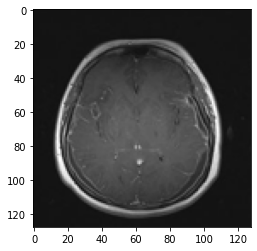

In [ ]:
#To check the data

print(plt.imshow(data[233]))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits()
i1 = 0

In [ ]:
train_index_list=[]; test_index_list = []
Xtrain_10fold = []; Ytrain_10fold = []; Xtest_10fold = []; Ytest_10fold = []

for train_index, test_index in kf.split(X,Y):
    train_index_list.append(train_index); test_index_list.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    Xtrain_10fold.append(X_train); Xtest_10fold.append(X_test)
    Ytrain_10fold.append(Y_train); Ytest_10fold.append(Y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2938, 128, 128, 3)
(326, 128, 128, 3)
(2938, 4)
(326, 4)


In [ ]:
input_shape = 128, 128, 3
num_classes = 4

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=input_shape)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 128, 128, 3)  0           ['normalization[0][0]']      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,Y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32)

Epoch 1/12
83/83 [==============================] - 251s 3s/step - loss: 0.1886 - accuracy: 0.9357 - val_loss: 1.0814 - val_accuracy: 0.7551
Epoch 2/12
83/83 [==============================] - 247s 3s/step - loss: 0.1126 - accuracy: 0.9599 - val_loss: 1.3777 - val_accuracy: 0.7075
Epoch 3/12
83/83 [==============================] - 248s 3s/step - loss: 0.0980 - accuracy: 0.9694 - val_loss: 1.0442 - val_accuracy: 0.7245
Epoch 4/12
83/83 [==============================] - 248s 3s/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 1.6194 - val_accuracy: 0.6531
Epoch 5/12
83/83 [==============================] - 252s 3s/step - loss: 0.0468 - accuracy: 0.9841 - val_loss: 1.6292 - val_accuracy: 0.7007
Epoch 6/12
83/83 [==============================] - 249s 3s/step - loss: 0.0443 - accuracy: 0.9830 - val_loss: 2.1876 - val_accuracy: 0.6803
Epoch 7/12
83/83 [==============================] - 244s 3s/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 2.0041 - val_accuracy: 0.6871
Epoch 8/12
83

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
Y_test_new = np.argmax(Y_test,axis=1)

11/11 [==============================] - 8s 558ms/step


In [ ]:
print(classification_report(Y_test_new,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        47
           1       1.00      0.92      0.96        95
           2       0.90      0.97      0.93        91
           3       0.99      0.90      0.94        93

    accuracy                           0.94       326
   macro avg       0.93      0.95      0.94       326
weighted avg       0.94      0.94      0.94       326

